# Preprocessing Part

In [ ]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from IPython.display import Image
from IPython.core.display import HTML
import seaborn as sns

%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import lars_path
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import r2_score
import haversine as hs
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
import re
import itertools
import string
import collections
from collections import Counter

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


## Reading Values

In [ ]:
listings = pd.read_csv(
    "/content/drive/MyDrive/listings.csv", header=0, parse_dates=["host_since"]
)
print("Columns present in the data: ", [i for i in listings.columns])
print("Number of data points: ", listings.shape[0])
listings.head()

Columns present in the data:  ['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availabi

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,number_of_reviews_l30d,first_review,last_review,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20211025162728,2021-10-26,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,0,2015-05-25,2019-04-04,00000957568,t,6,6,0,0,0.41
1,10990,https://www.airbnb.com/rooms/10990,20211025162728,2021-10-25,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,1,2015-11-25,2016-02-22,00001070920,t,6,6,0,0,0.72
2,10993,https://www.airbnb.com/rooms/10993,20211025162728,2021-10-25,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,3,2015-10-18,2018-03-31,00000957080,t,6,6,0,0,0.97
3,10995,https://www.airbnb.com/rooms/10995,20211025162728,2021-10-25,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,0,2015-12-05,2016-08-06,00000957422,t,6,6,0,0,0.33
4,27262,https://www.airbnb.com/rooms/27262,20211025162728,2021-10-26,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,0,2015-11-12,2017-05-15,00000957579,t,6,6,0,0,0.23


## Handling duplicated values

Here we check for duplicated values based on the listing id, as we can see there are no duplicated rows

In [ ]:
# check for duplicates and drop them based on the unique id's of each listing
listings.drop_duplicates(subset="id").reset_index(drop=True, inplace=True)
listings

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,number_of_reviews_l30d,first_review,last_review,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20211025162728,2021-10-26,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,...,0,2015-05-25,2019-04-04,00000957568,t,6,6,0,0,0.41
1,10990,https://www.airbnb.com/rooms/10990,20211025162728,2021-10-25,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,...,1,2015-11-25,2016-02-22,00001070920,t,6,6,0,0,0.72
2,10993,https://www.airbnb.com/rooms/10993,20211025162728,2021-10-25,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,...,3,2015-10-18,2018-03-31,00000957080,t,6,6,0,0,0.97
3,10995,https://www.airbnb.com/rooms/10995,20211025162728,2021-10-25,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apartment (47m2), on the ...",Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/6a565613-aaa3...,37177,https://www.airbnb.com/users/show/37177,...,0,2015-12-05,2016-08-06,00000957422,t,6,6,0,0,0.33
4,27262,https://www.airbnb.com/rooms/27262,20211025162728,2021-10-26,"54m2, 1-br, cable tv, wi-fi, metro",Big 1-bedroom apartment that can accommodate 4...,NaN,https://a0.muscache.com/pictures/8651803/4b82b...,37177,https://www.airbnb.com/users/show/37177,...,0,2015-11-12,2017-05-15,00000957579,t,6,6,0,0,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,52959003,https://www.airbnb.com/rooms/52959003,20211025162728,2021-10-25,Designed studio + Breakfast near Monastiraki S...,Lovely studio apartment of 30m² in a prime loc...,NaN,https://a0.muscache.com/pictures/02221d19-57d2...,3296820,https://www.airbnb.com/users/show/3296820,...,0,NaN,NaN,00174959325,t,19,19,0,0,NaN
9578,52959885,https://www.airbnb.com/rooms/52959885,20211025162728,2021-10-26,3 floor beds,Απολαύστε τα απλά πράγματα σε αυτόν τον γαλήνι...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,142353607,https://www.airbnb.com/users/show/142353607,...,0,NaN,NaN,00000240858,t,2,1,1,0,NaN
9579,52959925,https://www.airbnb.com/rooms/52959925,20211025162728,2021-10-26,Athens Spacious 4 Bedrooms 2 Bathrooms Apartment,A spacious apartment with 4 bedrooms and 2 bat...,NaN,https://a0.muscache.com/pictures/a0414000-d673...,103217576,https://www.airbnb.com/users/show/103217576,...,0,NaN,NaN,00001137032,t,11,11,0,0,NaN
9580,52960132,https://www.airbnb.com/rooms/52960132,20211025162728,2021-10-26,Athens Center Spacious Apartment 5th floor (33),Spacious and Central apartment ideal for big g...,NaN,https://a0.muscache.com/pictures/f673be27-96c5...,103217576,https://www.airbnb.com/users/show/103217576,...,0,NaN,NaN,00000173608,t,11,11,0,0,NaN


## Distribution of target variable

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


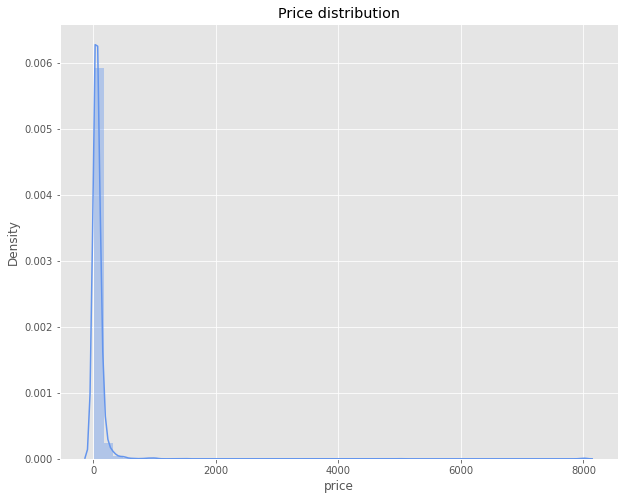

In [ ]:
listings["price"] = listings["price"].replace("[$,]", "", regex=True).astype(float)
plt.figure(figsize=(10, 8))
plt.style.use("ggplot")
sns.distplot(listings["price"], color="cornflowerblue")
plt.title("Price distribution")
plt.show()

## Normalise Price 

Since the target variable as we can observe from the above distribution plot is right skewed, we decided to take the log value of the price for our models. After creating the log price and plotting its distribution, we can see that it is much closer to the normal distribution

In [ ]:
log_price = np.log(listings["price"])
listings["log_price"] = log_price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.248997
Kurtosis: 5.298620


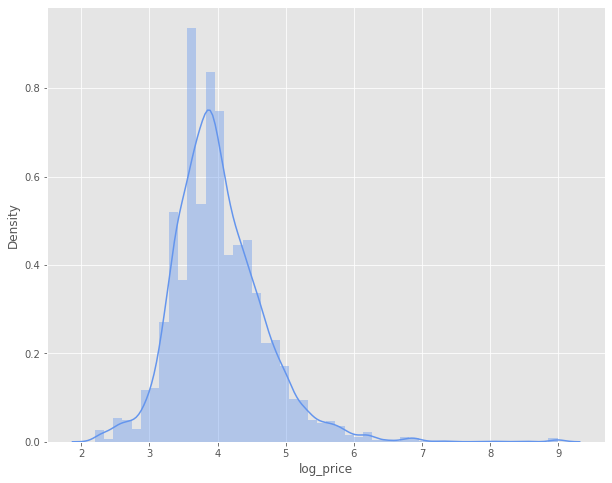

<Figure size 432x288 with 0 Axes>

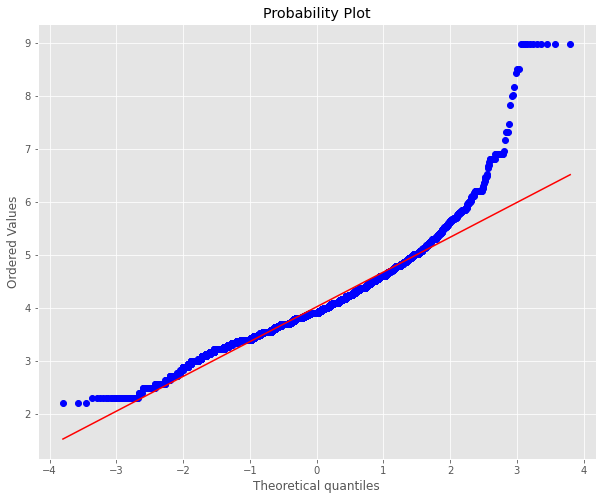

In [ ]:
plt.figure(figsize=(10, 8))
sns.distplot(listings["log_price"], color="cornflowerblue", kde=True)
fig = plt.figure()
plt.figure(figsize=(10, 8))
plt.title("Price distribution")
res = stats.probplot(listings["log_price"], plot=plt)
print("Skewness: %f" % listings["log_price"].skew())
print("Kurtosis: %f" % listings["log_price"].kurt())

Looking at the first histogram which visualizes the listing
price distribution across the dataset we realize that the histogram,  doesn’t follow a normal bellshaped curve due to it skewing to the left side. In order to correct this distribution, the log_e
transform of listing price was taken to normalize the distribution curve which is illustrated in the second
histogram. This improved distribution will provide a more accurate regression
analysis of the data.

In [ ]:
# we drop the initial price as it wont be used in our analysis
listings = listings.drop(["price"], axis=1)

## Replace T/F values

All boolean features (t/f) are replaced with 0 and 1

In [ ]:
# Replacing columns with f/t with 0/1
listings = listings.replace({"f": 0, "t": 1})

In [ ]:
df = listings.copy()

## Fix the few NA values

In [ ]:
# replace na values with median in features "beds" and "reviews_per_month"
df["reviews_per_month"] = df["reviews_per_month"].fillna(
    df["reviews_per_month"].median()
)
df["beds"] = df["beds"].fillna(df["beds"].median())

## Handle "license" feature

If a listing has a licence, we consider this value as 1, and create another column named " Has licence" indicating the absence or presence of a licence in that listing

In [ ]:
# Create has license column and drop license column
temp = [1 if type(df["license"][i]) is str else 0 for i in range(df.shape[0])]
temp.count(0), temp.count(1), len(temp)

# Create has license column
df["has_license"] = temp

## Host since 

In [ ]:
# Convert str hos_since to timestamp
df["host_since"] = df.host_since.values.astype(np.int64) // 10**9

## Bathroom

For the bathroom feature, null values will be replaced with the most common bathroom value, that is 1 bath. Next we will remove all characters from each value of this feature and keep only the numeric value that represents the number of baths

In [ ]:
df["bathrooms_text"] = df["bathrooms_text"].fillna("1 bath")

In [ ]:
bathrooms_text = df["bathrooms_text"]
bathrooms_text = bathrooms_text.replace(
    {"Half-bath": "0.5", "Shared half-bath": "0.5"}, regex=True
)
for i, val in enumerate(bathrooms_text):
    bathrooms_text[i] = re.findall("[-+]?(?:\d*\.\d+|\d+)", val)[0]

df["bathrooms_text"] = bathrooms_text
df["bathrooms_text"] = df["bathrooms_text"].astype(float)
df.rename(columns={"bathrooms_text": "bathrooms"})

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms,bedrooms,beds,amenities,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,log_price,has_license
0,10595,https://www.airbnb.com/rooms/10595,20211025162728,2021-10-26,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/f7e19a44-5afe...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,1252368000,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,NaN,NaN,NaN,1.0,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.988630,23.765270,Entire rental unit,Entire home/apt,8,NaN,2.0,3.0,5.0,"[""Kitchen"", ""Free street parking"", ""Crib"", ""Pa...",1,1125,2,8,1125,1125,2.3,1125.0,NaN,1,19,49,79,170,2021-10-26,32,7,0,2015-05-25,2019-04-04,00000957568,1,6,6,0,0,0.41,4.369448,1
1,10990,https://www.airbnb.com/rooms/10990,20211025162728,2021-10-25,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/8645179/c1728...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,1252368000,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,NaN,NaN,NaN,1.0,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.989030,23.764480,Entire rental unit,Entire home/apt,4,NaN,1.0,1.0,1.0,"[""Kitchen"", ""Luggage dropoff allowed"", ""Free s...",1,1125,1,8,1125,1125,1.5,1125.0,NaN,1,26,56,86,361,2021-10-25,52,12,1,2015-11-25,2016-02-22,00001070920,1,6,6,0,0,0.72,3.912023,1
2,10993,https://www.airbnb.com/rooms/10993,20211025162728,2021-10-25,Athens Quality Apartments - Studio,The Studio is an <br />-excellent located <br ...,Ampelokipi district is nice multinational and ...,https://a0.muscache.com/pictures/107309527/848...,37177,https://www.airbnb.com/users/show/37177,Emmanouil,1252368000,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,NaN,NaN,NaN,1.0,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6.0,6.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",1.0,1.0,"Athens, Attica, Greece",ΑΜΠΕΛΟΚΗΠΟΙ,NaN,37.988880,23.764730,Entire rental unit,Entire home/apt,2,NaN,1.0,NaN,1.0,"[""Kitchen"", ""Free street parking"", ""Patio or b...",1,1125,1,8,1125,1125,2.2,1125.0,NaN,1,15,26,56,331,2021-10-25,71,19,3,2015-10-18,2018-03-31,00000957080,1,6,6,0,0,0.97,3.637586,1
3,10995,https://www.airbnb.com/rooms/10995,20211025162728,2021-10-25,"AQA-No2 1-bedroom, smart tv, fiber connection,","AQA No2 is 1-bedroom apar

In [ ]:
df["bathrooms"].value_counts()

Series([], Name: bathrooms, dtype: int64)

## Spatial Data

Geographical monuments like Acropolis and Syntagma square influence the price of a property. Therefore we add two new features in our data, indicating the kilometric distance to Acropolis and Syntagma from the listing's location

In [ ]:
# Lat, Long of monuments
Acropolis = (37.97255619074434, 23.725852581085093)
Syntagma_square = (37.975753697142274, 23.734870097114324)

# use haversine for lat,lon distances
dist_acropolis = []
dist_syntagma = []

for lat, lon in zip(df.latitude, df.longitude):
    dist_acropolis.append(hs.haversine(Acropolis, (lat, lon)))
    dist_syntagma.append(hs.haversine(Syntagma_square, (lat, lon)))

df["Dist_Acropolis"] = dist_acropolis
df["Dist_Syntagma"] = dist_syntagma

## Feature selection

Considering our EDA analysis and the work on top papers and different thesis we decided to keep the following features.

In [ ]:
### the following code drops the unnecessary columns (mostly the non-numeric columns)
to_drop = [
    "host_response_rate",
    "id",
    "picture_url",
    "property_type",
    "listing_url",
    "scrape_id",
    "last_scraped",
    "name",
    "description",
    "neighborhood_overview",
    "host_id",
    "calendar_last_scraped",
    "host_url",
    "host_name",
    "host_thumbnail_url",
    "host_picture_url",
    "host_since",
    "host_location",
    "host_neighbourhood",
    "host_about",
    "host_response_time",
    "host_listings_count",
    "host_total_listings_count",
    "host_verifications",
    "neighbourhood",
    "longitude",
    "latitude",
    "calendar_last_scraped",
    "host_acceptance_rate",
    "license",
    "amenities",
    "first_review",
    "neighbourhood_group_cleansed",
    "last_review",
    "calculated_host_listings_count",
    "calculated_host_listings_count_entire_homes",
    "calculated_host_listings_count_private_rooms",
    "calculated_host_listings_count_shared_rooms",
    "calendar_updated",
    "minimum_minimum_nights",
    "maximum_maximum_nights",
    "bathrooms",
    "number_of_reviews_ltm",
    "number_of_reviews_l30d",
    "bedrooms",
]
df = df.drop(columns=to_drop)
df.head()

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms_text,beds,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,reviews_per_month,log_price,has_license,Dist_Acropolis,Dist_Syntagma
0,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,8,2.0,5.0,1,1125,8,1125,2.3,1125.0,1,19,49,79,170,32,1,0.41,4.369448,1,3.889739,3.024714
1,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,4,1.0,1.0,1,1125,8,1125,1.5,1125.0,1,26,56,86,361,52,1,0.72,3.912023,1,3.849331,2.985638
2,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,2,1.0,1.0,1,1125,8,1125,2.2,1125.0,1,15,26,56,331,71,1,0.97,3.637586,1,3.860750,2.996546
3,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,4,1.0,2.0,1,1125,8,1125,1.5,1125.0,1,22,52,82,357,24,1,0.33,3.871201,1,3.849331,2.985638
4,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,4,1.0,1.0,1,1125,8,1125,1.8,1125.0,1,0,27,57,208,17,1,0.23,3.850148,1,3.900524,3.036796


In [ ]:
a = df.columns.tolist()
a

['host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'has_availability',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'instant_bookable',
 'reviews_per_month',
 'log_price',
 'has_license',
 'Dist_Acropolis',
 'Dist_Syntagma']

## Drop Rows with empty values

In [ ]:
# Reset index after drop
df = df.dropna().reset_index(drop=True)
df

,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,room_type,accommodates,bathrooms_text,beds,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,instant_bookable,reviews_per_month,log_price,has_license,Dist_Acropolis,Dist_Syntagma
0,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,8,2.0,5.0,1,1125,8,1125,2.3,1125.0,1,19,49,79,170,32,1,0.41,4.369448,1,3.889739,3.024714
1,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,4,1.0,1.0,1,1125,8,1125,1.5,1125.0,1,26,56,86,361,52,1,0.72,3.912023,1,3.849331,2.985638
2,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,2,1.0,1.0,1,1125,8,1125,2.2,1125.0,1,15,26,56,331,71,1,0.97,3.637586,1,3.860750,2.996546
3,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,4,1.0,2.0,1,1125,8,1125,1.5,1125.0,1,22,52,82,357,24,1,0.33,3.871201,1,3.849331,2.985638
4,1.0,1.0,1.0,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,4,1.0,1.0,1,1125,8,1125,1.8,1125.0,1,0,27,57,208,17,1,0.23,3.850148,1,3.900524,3.036796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9574,1.0,1.0,1.0,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,Entire home/apt,2,1.0,1.0,1,1125,1,1125,1.0,1125.0,1,21,51,81,341,0,1,1.20,2.302585,1,0.542200,0.580185
9575,0.0,1.0,1.0,ΝΕΟΣ ΚΟΣΜΟΣ,Private room,3,1.0,3.0,1,365,1,365,1.0,365.0,1,30,60,90,365,0,1,1.20,3.433987,1,1.899272,2.222390
9576,0.0,1.0,1.0,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Entire home/apt,13,2.0,9.0,1,365,1,1125,1.0,1125.0,1,24,54,84,359,0,1,1.20,4.174387,1,1.429851,1.453418
9577,0.0,1.0,1.0,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,Entire home/apt,16,1.5,7.0,1,365,1,365,1.0,365.0,1,24,54,84,359,0,1,1.20,4.369448,1,1.763035,1.414453


In [ ]:
# This file will be used for the flask app
path = "/content/drive/My Drive/"

with open(path + "aibnb.csv", "w") as f:
    df.to_csv(f)

# Create dummy variables for our categorical features

Next we create dummies for our numeric variables. A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something (e.g., a 0 indicates a host is not superhost and 1 indicates a host is superhost). Where a categorical variable has more than two categories, it is represented by a set of dummy variables, with one variable for each category. In our case we decided to use the "drop_first=True" argument, which helps in reducing the extra column created during dummy variable creation. Hence it reduces the correlations created among dummy variables

In [ ]:
df_encoded = pd.get_dummies(
    df,
    columns=[
        "neighbourhood_cleansed",
        "room_type",
        "host_is_superhost",
        "host_has_profile_pic",
        "host_identity_verified",
        "has_availability",
        "instant_bookable",
        "has_license",
    ],
    drop_first=True,
)

The final dataset consists of 69 explanatory variables to be used in our models

In [ ]:
pd.set_option("display.max_columns", None)
df_encoded

,accommodates,bathrooms_text,beds,minimum_nights,maximum_nights,maximum_minimum_nights,minimum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,reviews_per_month,log_price,Dist_Acropolis,Dist_Syntagma,neighbourhood_cleansed_ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,neighbourhood_cleansed_ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,neighbourhood_cleansed_ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,neighbourhood_cleansed_ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,neighbourhood_cleansed_ΑΚΡΟΠΟΛΗ,neighbourhood_cleansed_ΑΜΠΕΛΟΚΗΠΟΙ,neighbourhood_cleansed_ΑΝΩ ΚΥΨΕΛΗ,neighbourhood_cleansed_ΑΝΩ ΠΑΤΗΣΙΑ,neighbourhood_cleansed_ΒΟΤΑΝΙΚΟΣ,neighbourhood_cleansed_ΓΚΑΖΙ,neighbourhood_cleansed_ΓΚΥΖΗ,neighbourhood_cleansed_ΓΟΥΒΑ,neighbourhood_cleansed_ΓΟΥΔΙ,neighbourhood_cleansed_ΕΛΛΗΝΟΡΩΣΩΝ,neighbourhood_cleansed_ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,neighbourhood_cleansed_ΖΑΠΠΕΙΟ,neighbourhood_cleansed_ΘΗΣΕΙΟ,neighbourhood_cleansed_ΙΛΙΣΙΑ,neighbourhood_cleansed_ΚΕΡΑΜΕΙΚΟΣ,neighbourhood_cleansed_ΚΟΛΟΚΥΝΘΟΥ,neighbourhood_cleansed_ΚΟΛΩΝΑΚΙ,neighbourhood_cleansed_ΚΟΛΩΝΟΣ,neighbourhood_cleansed_ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,neighbourhood_cleansed_ΚΥΨΕΛΗ,neighbourhood_cleansed_ΛΥΚΑΒΗΤΤΟΣ,neighbourhood_cleansed_ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,neighbourhood_cleansed_ΝΕΑ ΚΥΨΕΛΗ,neighbourhood_cleansed_ΝΕΟΣ ΚΟΣΜΟΣ,neighbourhood_cleansed_ΝΙΡΒΑΝΑ,neighbourhood_cleansed_ΠΑΓΚΡΑΤΙ,neighbourhood_cleansed_ΠΑΤΗΣΙΑ,neighbourhood_cleansed_ΠΕΔΙΟ ΑΡΕΩΣ,neighbourhood_cleansed_ΠΕΝΤΑΓΩΝΟ,neighbourhood_cleansed_ΠΕΤΡΑΛΩΝΑ,neighbourhood_cleansed_ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ,neighbourhood_cleansed_ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,neighbourhood_cleansed_ΠΟΛΥΓΩΝΟ,neighbourhood_cleansed_ΠΡΟΜΠΟΝΑ,neighbourhood_cleansed_ΡΗΓΙΛΛΗΣ,neighbourhood_cleansed_ΡΙΖΟΥΠΟΛΗ,neighbourhood_cleansed_ΣΕΠΟΛΙΑ,neighbourhood_cleansed_ΣΤΑΔΙΟ,neighbourhood_cleansed_ΣΤΑΘΜΟΣ ΛΑΡΙΣΗΣ,room_type_Hotel room,room_type_Private room,room_type_Shared room,host_is_superhost_1.0,host_has_profile_pic_1.0,host_identity_verified_1.0,has_availability_1,instant_bookable_1,has_license_1
0,8,2.0,5.0,1,1125,8,1125,2.3,1125.0,19,49,79,170,32,0.41,4.369448,3.889739,3.024714,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
1,4,1.0,1.0,1,1125,8,1125,1.5,1125.0,26,56,86,361,52,0.72,3.912023,3.849331,2.985638,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
2,2,1.0,1.0,1,1125,8,1125,2.2,1125.0,15,26,56,331,71,0.97,3.637586,3.860750,2.996546,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
3,4,1.0,2.0,1,1125,8,1125,1.5,1125.0,22,52,82,357,24,0.33,3.871201,3.849331,2.985638,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
4,4,1.0,1.0,1,1125,8,1125,1.8,1125.0,0,27,57,208,17,0.23,3.850148,3.900524,3.036796,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9574,2,1.0,1.0,1,1125,1,1125,1.0,1125.0,21,51,81,341,0,1.20,2.302585,0.542200,0.580185,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
9575,3,1.0,3.0,1,365,1,365,1.0,365.0,30,60,90,365,0,1.20,3.433987,1.899272,2.222390,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1
9576,13,2.0,9.0,1,365,1,1125,1.0,1125.0,24,54,84,359,0,1.20,4.174387,1.429851,1.453418,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
9577,16,1.5,7.0,1,365,1,365,1.0,365.0,24,54,84,359,0,1.20,4.369448,1.763035,1.414453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


The below list presents each feature created in our data

In [ ]:
list(df_encoded.columns.values)

['accommodates',
 'bathrooms_text',
 'beds',
 'minimum_nights',
 'maximum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'reviews_per_month',
 'log_price',
 'Dist_Acropolis',
 'Dist_Syntagma',
 'neighbourhood_cleansed_ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ',
 'neighbourhood_cleansed_ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ',
 'neighbourhood_cleansed_ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ',
 'neighbourhood_cleansed_ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ',
 'neighbourhood_cleansed_ΑΚΡΟΠΟΛΗ',
 'neighbourhood_cleansed_ΑΜΠΕΛΟΚΗΠΟΙ',
 'neighbourhood_cleansed_ΑΝΩ ΚΥΨΕΛΗ',
 'neighbourhood_cleansed_ΑΝΩ ΠΑΤΗΣΙΑ',
 'neighbourhood_cleansed_ΒΟΤΑΝΙΚΟΣ',
 'neighbourhood_cleansed_ΓΚΑΖΙ',
 'neighbourhood_cleansed_ΓΚΥΖΗ',
 'neighbourhood_cleansed_ΓΟΥΒΑ',
 'neighbourhood_cleansed_ΓΟΥΔΙ',
 'neighbourhood_cleansed_ΕΛΛΗΝΟΡΩΣΩΝ',
 'neighbourhood_cleansed_ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ',
 'neighbourhood_cleansed_ΖΑΠΠΕΙΟ

## Histograms of features

As we can observe from the histograms almost all our numerical features are right skewed

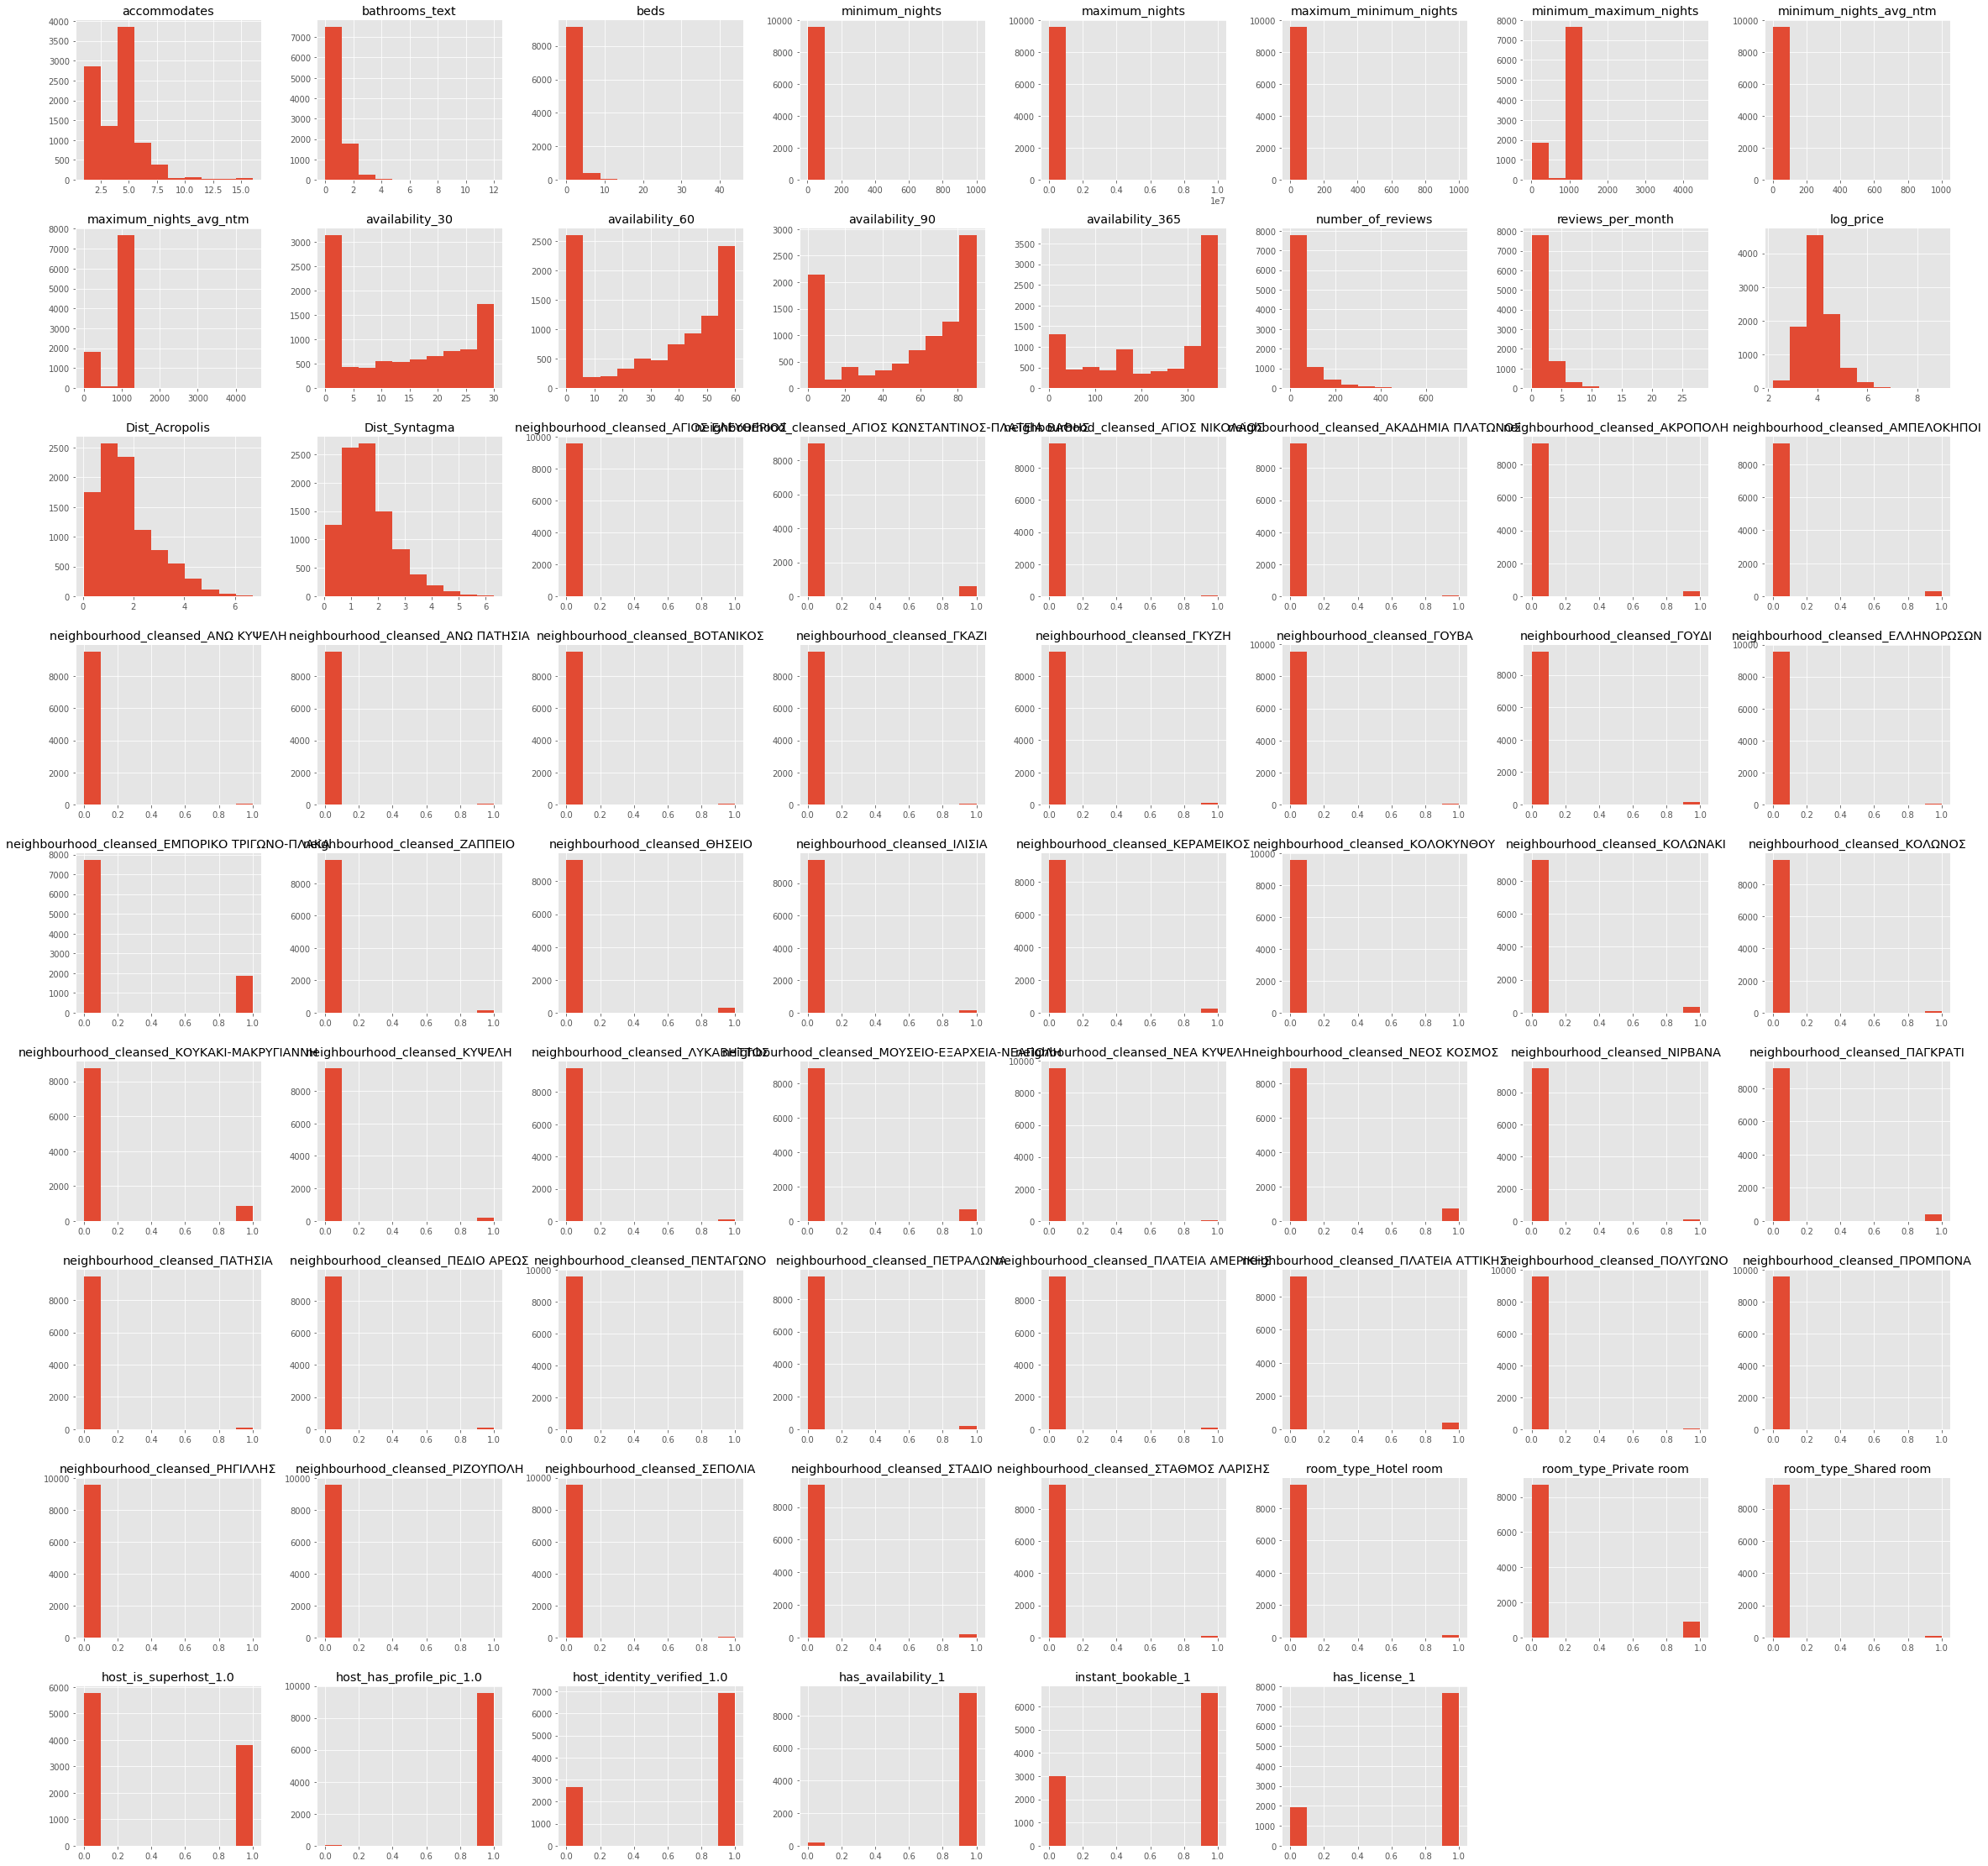

In [ ]:
df_encoded.hist(figsize=(40, 40));

## Outliers Detection & Elimination

We removed outlier variables that exceeded three standard deviations from the mean value of the columns below

In [ ]:
# delete outliers
margin_std = 3

# log_Price
mask = df_encoded[
    (
        df_encoded.log_price
        >= df_encoded.log_price.mean() + margin_std * df_encoded.log_price.std()
    )
    & (
        df_encoded.log_price
        <= df_encoded.log_price.mean() - margin_std * df_encoded.log_price.std()
    )
].index
df_encoded.drop(mask, inplace=True)

# Bathrooms_text
mask = df_encoded[
    (
        df_encoded.bathrooms_text
        >= df_encoded.bathrooms_text.mean()
        + margin_std * df_encoded.bathrooms_text.std()
    )
    & (
        df_encoded.bathrooms_text
        >= df_encoded.bathrooms_text.mean()
        - margin_std * df_encoded.bathrooms_text.std()
    )
].index
df_encoded.drop(mask, inplace=True)

# reviews_per_month
mask = df_encoded[
    (
        df_encoded.reviews_per_month
        >= df_encoded.reviews_per_month.mean()
        + margin_std * df_encoded.reviews_per_month.std()
    )
    & (
        df_encoded.reviews_per_month
        >= df_encoded.reviews_per_month.mean()
        - margin_std * df_encoded.reviews_per_month.std()
    )
].index
df_encoded.drop(mask, inplace=True)

# number_of_reviews
mask = df_encoded[
    (
        df_encoded.number_of_reviews
        >= df_encoded.number_of_reviews.mean()
        + margin_std * df_encoded.number_of_reviews.std()
    )
    & (
        df_encoded.number_of_reviews
        >= df_encoded.number_of_reviews.mean()
        + margin_std * df_encoded.number_of_reviews.std()
    )
].index
df_encoded.drop(mask, inplace=True)

In [ ]:
df_encoded.shape

(8982, 70)

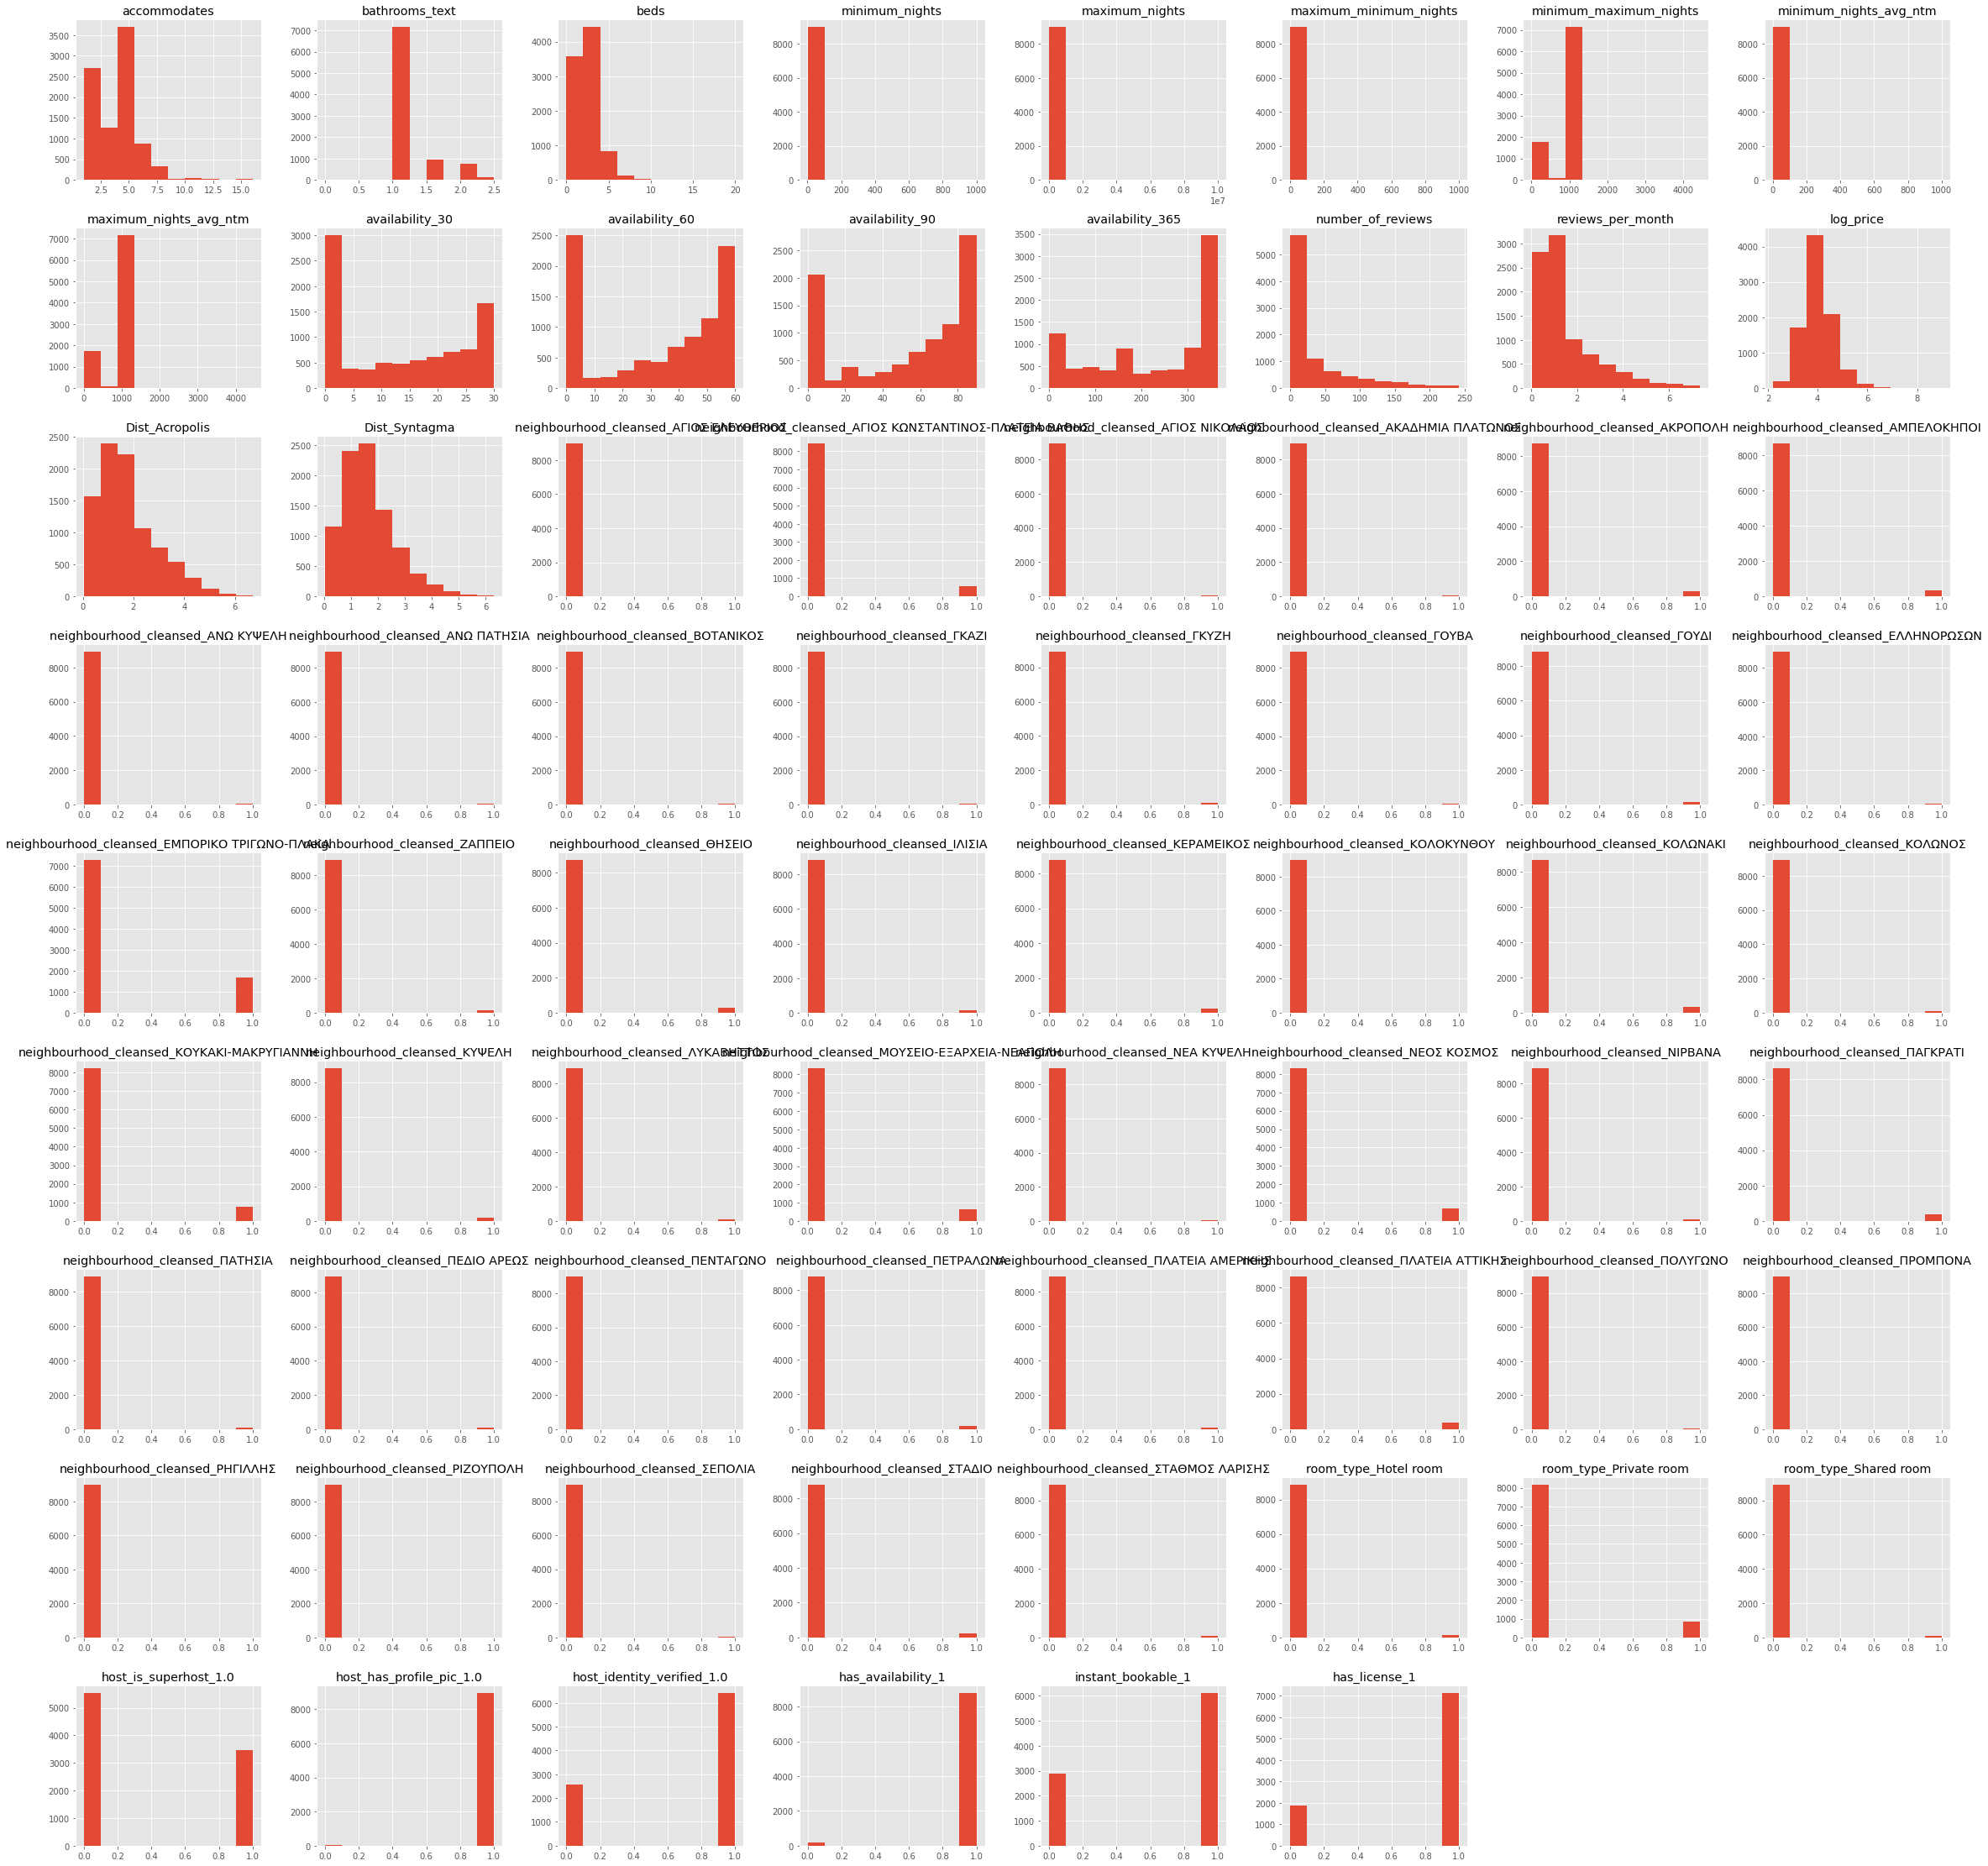

In [ ]:
df_encoded.hist(figsize=(40, 40));

# Shuffling and splitting dataset

We split our dataset into train (to train the models and find optimal parameters) and test (to evaluate the performace of the models)

In [ ]:
# Set seed 42 for reproducibility purposes
seed = 42

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    df_encoded.loc[:, df_encoded.columns != "log_price"],
    df_encoded["log_price"],
    test_size=0.2,
    random_state=seed,
)

In [ ]:
## print shape of each dataset
print(f"No. of training x_data: {x_train.shape[0]}")
print(f"No. of testing x_data: {x_test.shape[0]}")
print(f"No. of training y_data: {y_train.shape[0]}")
print(f"No. of testing y_data: {y_test.shape[0]}")

No. of training x_data: 7185
No. of testing x_data: 1797
No. of training y_data: 7185
No. of testing y_data: 1797


In [ ]:
# reset index after split
x_train = x_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

## Download Data

In [ ]:
path = "/content/drive/My Drive/"

In [ ]:
with open(path + "x_train.csv", "w") as f:
    x_train.to_csv(f)

In [ ]:
with open(path + "x_test.csv", "w") as f:
    x_test.to_csv(f)

In [ ]:
with open(path + "y_train.csv", "w") as f:
    y_train.to_csv(f)

In [ ]:
with open(path + "y_test.csv", "w") as f:
    y_test.to_csv(f)